# ML Practical Assignment - 2

### Importing all the required libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from patsy import dmatrices
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
sm.datasets.fair.load_pandas().data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df['affairs'] = (df.affairs>0).astype(int)

In [5]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [6]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

### EDA and Pre-processing

In [11]:
pf = ProfileReport(df)

In [12]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Using dark background
plt.style.use("dark_background")

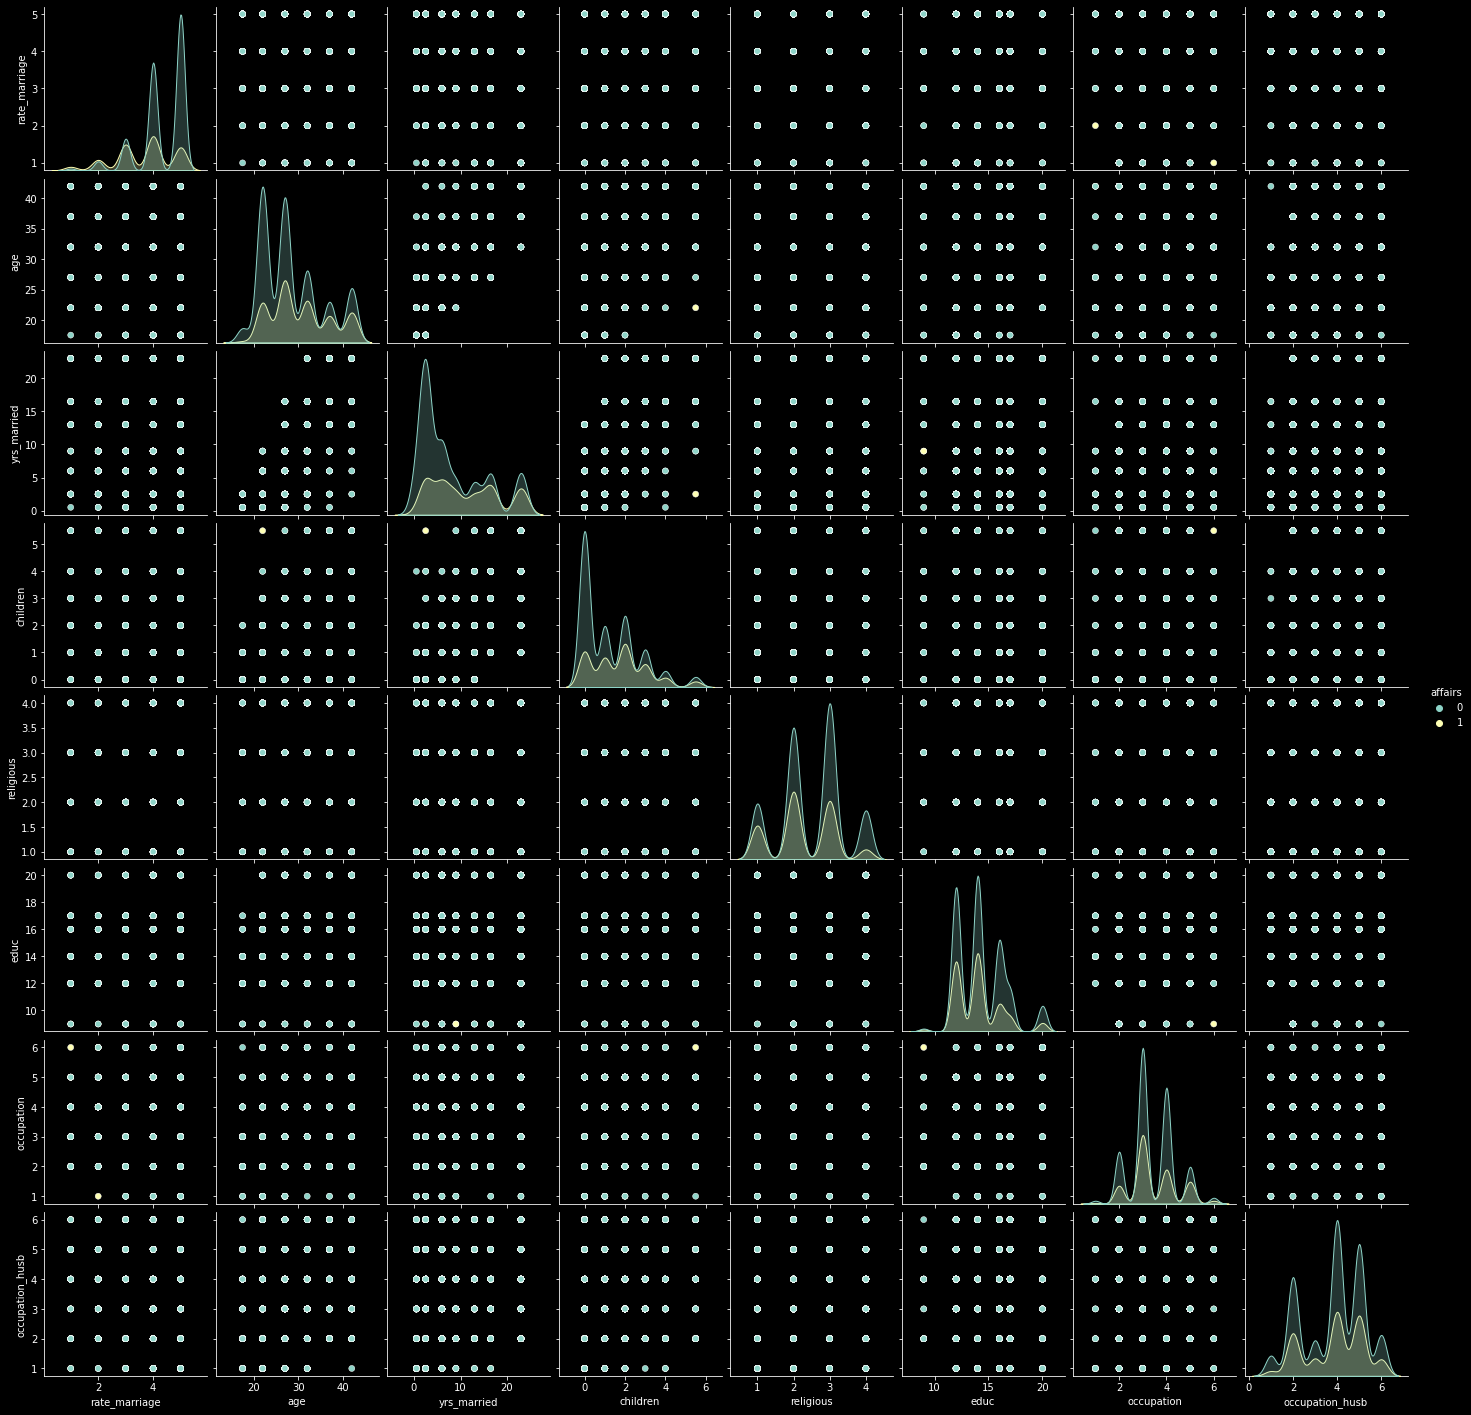

In [15]:
sns.pairplot(df,hue="affairs")

In [16]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [18]:
x = df.drop(columns=["affairs"])

In [19]:
y = df["affairs"]

In [21]:
#Sacling the data
scalar = StandardScaler()
X = scalar.fit_transform(x)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame() #Creating empty dataframe

In [28]:
vif["VIF"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [29]:
vif["Features"] = x.columns

In [30]:
vif

,VIF,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [52]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [53]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
lg_predict = lg_model.predict(x_test)
accuracy_score(lg_predict,y_test)

0.7201332698714897

In [54]:
lg_model.score(x_train,y_train)

0.724736225087925

In [55]:
lg_model.score(x_test,y_test)

0.7201332698714897

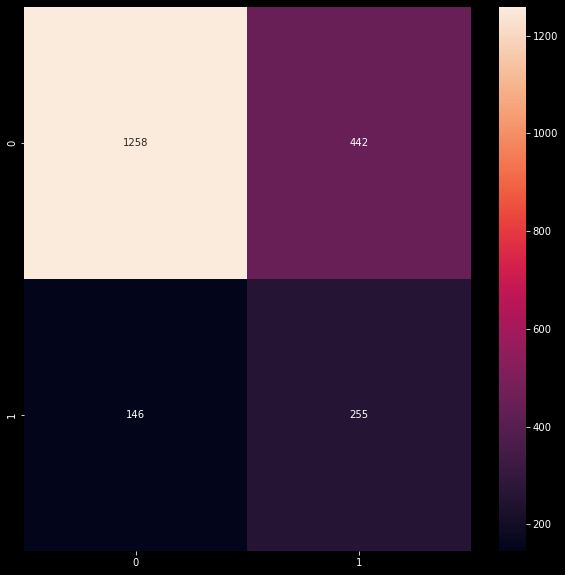

In [115]:
cm = confusion_matrix(lg_predict,y_test)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [117]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'] 
}

In [118]:
grid = GridSearchCV(lg_model,param_grid=parameters,cv=10,scoring='accuracy')

In [119]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [120]:
grid.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}

In [121]:
model = LogisticRegression(solver='saga',
                          penalty='l2',
                          multi_class='auto')
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
accuracy_score(model_pred,y_test)

0.7201332698714897

In [122]:
model.score(x_train,y_train)

0.724736225087925

In [123]:
model.score(x_test,y_test)

0.7201332698714897